In [16]:
import pandas as pd
import cv2
import glob
import os
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from keras.utils import np_utils

In [17]:
from LeNet import LeNet

In [18]:
fruits_name = [name for name in os.listdir(r'D:\Machine Learning 3\fruits-360\Training')]

In [19]:
# load benchmark model
LeNet5 = LeNet.build(weightsPath = r'D:\Machine Learning 3\Assignment fruit\Benchmark\Variation\Tuned\Adagrad.hdf5',
                    numChannels=3, imgRows=100, imgCols=100, numClasses=81)

In [20]:
# load train labels
# make an empty list to store training image and label
trainLabels = []

# loop through images in training folder, read image and append to dataframe
for name in fruits_name:
    folder_path = r'D:\Machine Learning 3\fruits-360\Training\\' + name + '\\'
    glob_path = glob.glob(folder_path + '*.jpg')
    for im_path in glob_path:
        trainLabels.append(name)

trainLabels = np.array(trainLabels)

In [21]:
# load test data
fruits_name = [name for name in os.listdir(r'D:\Machine Learning 3\fruits-360\Training')]
testData = []
testLabels = []

# loop through images in test folder, read image and append to dataframe
for name in fruits_name:
    folder_path = r'D:\Machine Learning 3\fruits-360\Test\\' + name + '\\'
    glob_path = glob.glob(folder_path + '*.jpg')
    for im_path in glob_path:
        im_tempo = cv2.imread(im_path)
        testData.append(im_tempo)
        testLabels.append(name)
testData = np.array(testData)
testLabels = np.array(testLabels)

In [22]:
# scale data to [0,1]
testData = testData.astype('float32')/255.0

In [23]:
# factorize labels and keep a save record for later reference
tempo = np.concatenate((trainLabels, testLabels))                          # concatenate labels into one
factorize = pd.factorize(tempo)                                            # factorzie labels
tempo_category = np_utils.to_categorical(factorize[0], len(fruits_name))   # categorize labels
trainLabels = tempo_category[:len(trainLabels)]                            # put categorized labels to data
testLabels = tempo_category[len(trainLabels):]                             # put categorized labels to data_test
fruit_table = pd.Series(factorize[1])                                      # create table for later references
del tempo
del tempo_category
del trainLabels

In [24]:
# predict on test dataset
predict_label = LeNet5.predict(testData, batch_size = 256, verbose = 1)

13877/13877 [==============================] - 83s 6ms/step


In [25]:
# turn the predict vector to final predict base on argmax
predict_label = [np.argmax(i) for i in predict_label]

In [26]:
# turn the test labels vector to final label base on argmax
testLabels = [np.argmax(i) for i in testLabels]

In [27]:
# classification report
print(classification_report(testLabels, predict_label))

              precision    recall  f1-score   support

           0       0.95      0.74      0.83       164
           1       1.00      0.99      1.00       164
           2       1.00      1.00      1.00       164
           3       0.77      0.98      0.86       161
           4       0.98      0.99      0.98       164
           5       0.87      0.79      0.83       164
           6       1.00      0.96      0.98       164
           7       0.81      1.00      0.89       144
           8       1.00      1.00      1.00       166
           9       1.00      0.89      0.94       164
          10       1.00      0.94      0.97       164
          11       1.00      1.00      1.00       143
          12       1.00      1.00      1.00       166
          13       1.00      0.80      0.89       166
          14       0.96      0.74      0.84       166
          15       0.83      1.00      0.91       166
          16       1.00      1.00      1.00       164
          17       1.00    

In [28]:
# tạo dataframe của truth label và predict label
result = pd.DataFrame({'truth':testLabels,'predict':predict_label})
result = result[result.truth != result.predict]

In [29]:
# đếm số trường hợp predict sai
truth = []
predict = []
wrong = []
for i in result.truth.unique():
    truth_name = fruit_table[i]
    temp = result[result.truth == i]
    for j in temp.predict.unique():
        predict_name = fruit_table[j]
        wrong_predict_case = temp[result.predict == j].predict.count()
        truth.append(truth_name)
        predict.append(predict_name)
        wrong.append(wrong_predict_case)
        
cf_matrix = pd.DataFrame({'Truth':truth,'Predict':predict,'wrongNumber':wrong}).sort_values('wrongNumber', ascending=False)

C:\Users\PC\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


In [32]:
cf_matrix.head(10)

,Truth,Predict,wrongNumber
14,Cherry 1,Cherry 2,61
15,Cherry 2,Cherry 1,60
27,Pear,Apple Golden 3,46
0,Apple Braeburn,Nectarine,43
24,Nectarine,Peach,39
4,Apple Red 1,Apple Red 3,34
12,Banana Red,Mulberry,34
9,Banana,Cactus fruit,33
33,Plum,Cherry 2,27
22,Mandarine,Kumquats,23


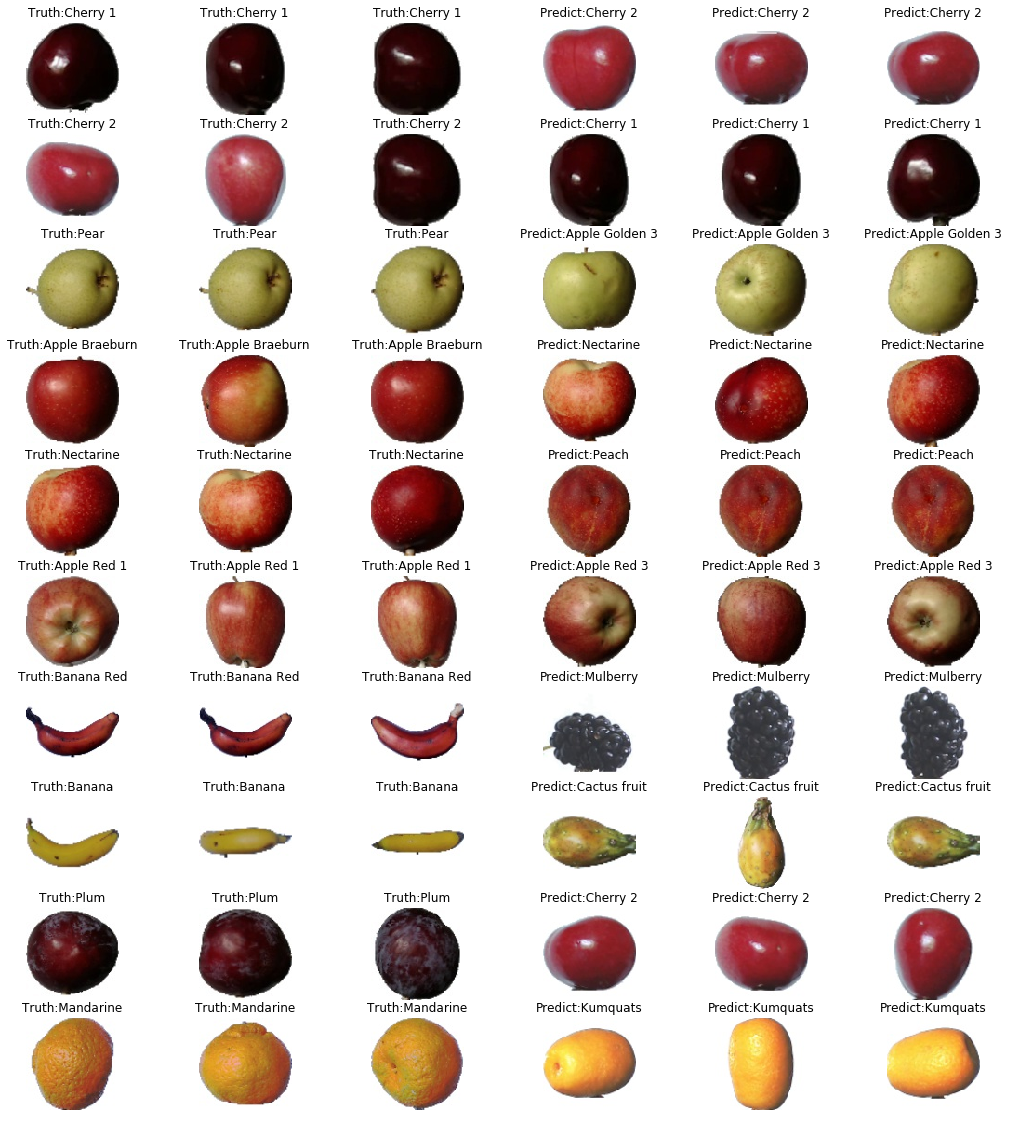

In [33]:
# hình ảnh top 10 loại hay bị phân loại nhầm
import random as rd
ax_row_idx = 0
ax_col_idx = 0
f, ax = plt.subplots(ncols=6, nrows=10, figsize=(3*6, 20), sharey=True)
for i in range(10):
    truth_name = cf_matrix.iloc[i,:].Truth
    predict_name = cf_matrix.iloc[i,:].Predict
    truth_folder_path = r'D:\Machine Learning 3\fruits-360\Test\\' + truth_name + '\\'
    predict_folder_path = r'D:\Machine Learning 3\fruits-360\Test\\' + predict_name + '\\'
    glob_path_truth = glob.glob(truth_folder_path + '*.jpg')
    glob_path_predict = glob.glob(predict_folder_path + '*.jpg')
    # vẽ 3 hình Truth
    for i in range(3):
        im_path = rd.choice(glob_path_truth)
        im_data = cv2.imread(im_path)
        im_data = cv2.cvtColor(im_data, cv2.COLOR_BGR2RGB)
        ax[ax_row_idx][ax_col_idx].imshow(im_data, aspect='equal')
        sb.despine(ax=ax[ax_row_idx][ax_col_idx],left=True,bottom=True)
        ax[ax_row_idx][ax_col_idx].set(xticks=[],yticks=[],title='Truth:' + truth_name)
        ax_col_idx += 1
    # vẽ 3 hình Predict
    for i in range(3):
        im_path = rd.choice(glob_path_predict)
        im_data = cv2.imread(im_path)
        im_data = cv2.cvtColor(im_data, cv2.COLOR_BGR2RGB)
        ax[ax_row_idx][ax_col_idx].imshow(im_data, aspect='equal')
        sb.despine(ax=ax[ax_row_idx][ax_col_idx],left=True,bottom=True)
        ax[ax_row_idx][ax_col_idx].set(xticks=[],yticks=[],title='Predict:' + predict_name)
        ax_col_idx += 1
    # sang hàng sau
    ax_row_idx += 1
    ax_col_idx = 0
plt.show()